In [ ]:
#  Сравнение ансамблевых моделей и нейронных сетей в задаче анализа медицинских данных

In [ ]:
# Датасет с Kaggle - https://www.kaggle.com/datasets/prathamtripathi/drug-classification
# Задача - классифицировать лекарства, которые прописывались пациентам с различными характеристиками

# The target feature is
# Drug type

# The feature sets are:
# Age
# Sex
# Blood Pressure Levels (BP)
# Cholesterol Levels
# Na to Potassium Ration

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
sns.set(font_scale=1.5)

from pylab import rcParams
rcParams['figure.figsize'] = 12, 8 
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Загружаю данные
!pip install opendatasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import opendatasets as od
  
od.download(
    "https://www.kaggle.com/datasets/prathamtripathi/drug-classification")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: artemye
Your Kaggle Key: ··········


100%|██████████| 1.68k/1.68k [00:00<00:00, 1.23MB/s]

In [ ]:
# Считываю и изучаю данные
df = pd.read_csv('/content/drug-classification/drug200.csv')
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [ ]:
print("Размер до дедубликации: ",df.shape)
df.drop_duplicates(inplace=True)
print("Размер после: ",df.shape)
# Дублирующих строк нет

Размер до дедубликации:  (200, 6)
Размер после:  (200, 6)


In [ ]:
# Датасет довольно небольшой, хорошо подходит для учебных целей
# Пропусков нет, во всех колонках по 200 непустых значений
# Далее визуализацией данных и поиском зависимостей

In [ ]:
df.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [ ]:
df.columns

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')

In [ ]:
df.Sex.value_counts()

M    104
F     96
Name: Sex, dtype: int64

In [ ]:
df.BP.value_counts()

HIGH      77
LOW       64
NORMAL    59
Name: BP, dtype: int64

In [ ]:
df.Cholesterol.value_counts()

HIGH      103
NORMAL     97
Name: Cholesterol, dtype: int64

In [ ]:
df.Drug.value_counts()

DrugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: Drug, dtype: int64

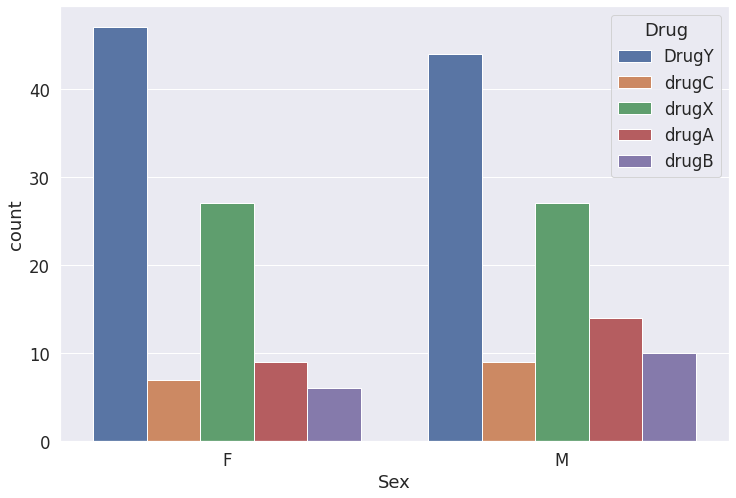

In [ ]:
sns.countplot(data=df, x="Sex", hue="Drug")
plt.show()

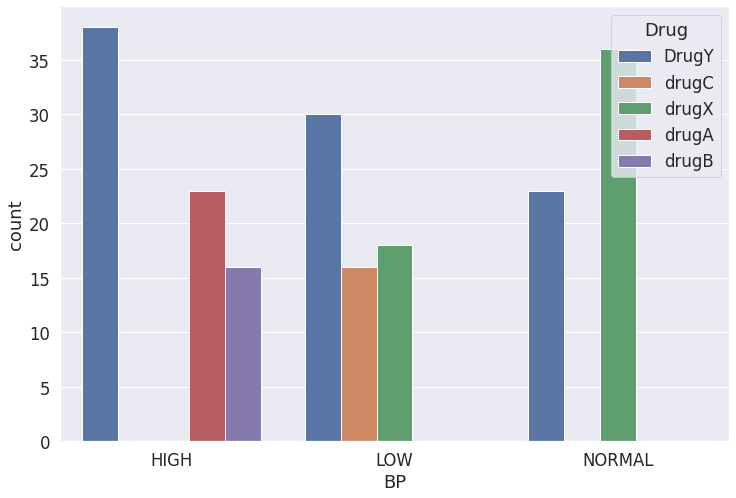

In [ ]:
sns.countplot(data=df, x="BP", hue="Drug")
plt.show()

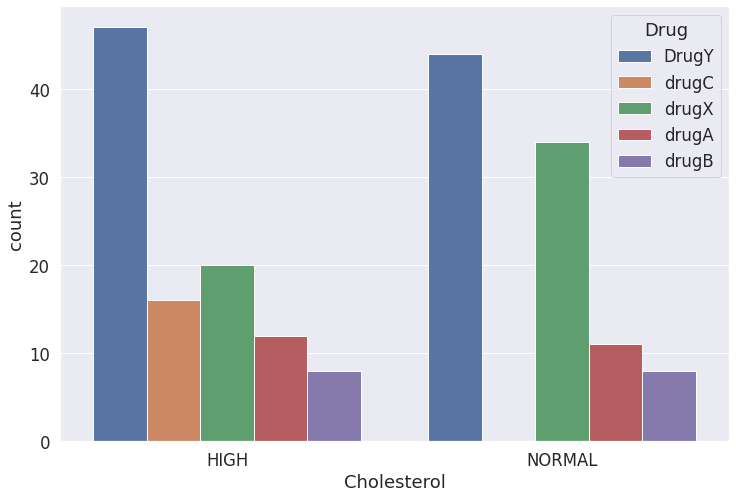

In [ ]:
sns.countplot(data=df, x="Cholesterol", hue="Drug")
plt.show()

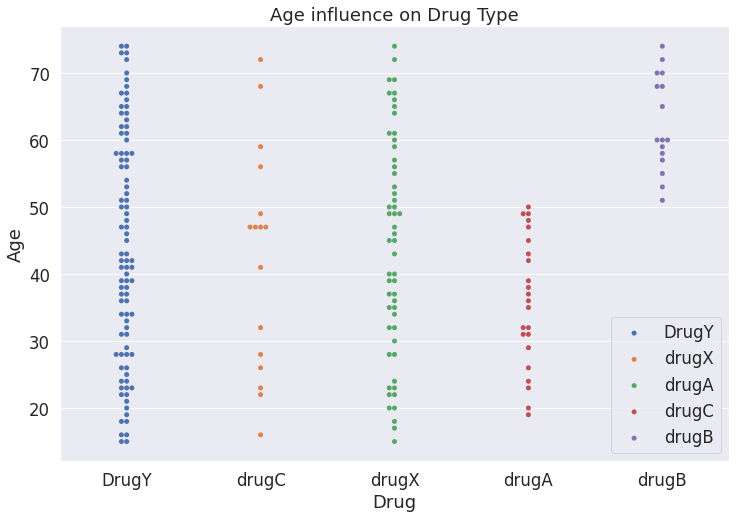

In [ ]:
sns.swarmplot(x = "Drug", y = "Age",data = df)
plt.legend(df.Drug.value_counts().index)
plt.title("Age influence on Drug Type")
plt.show()

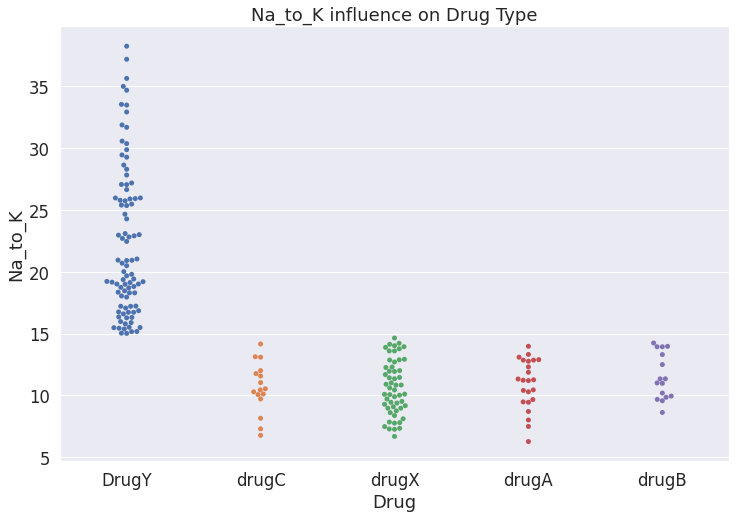

In [ ]:
sns.swarmplot(x = "Drug", y = "Na_to_K",data = df)
plt.title("Na_to_K influence on Drug Type")
plt.show()

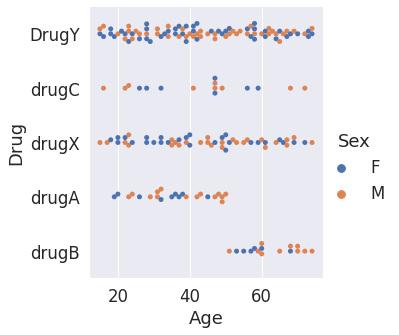

In [ ]:
sns.catplot(data=df, x="Age", y="Drug", hue="Sex", kind="swarm")
plt.show()

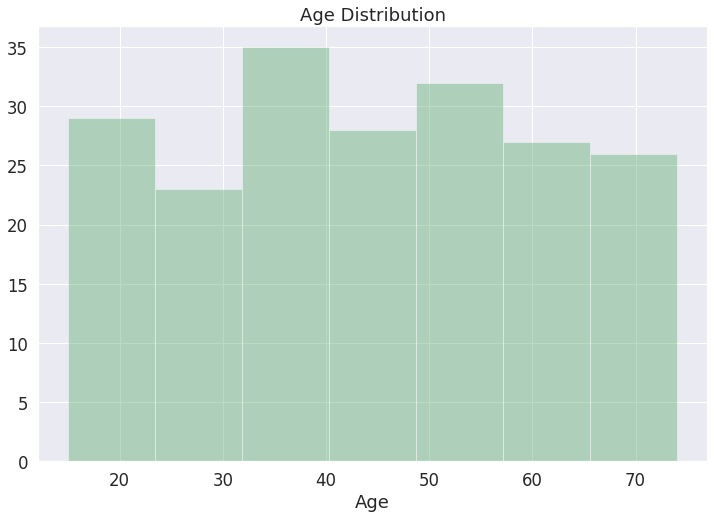

In [ ]:
plt.title("Age Distribution")
sns.distplot(df.Age, kde = False, color = "g")
plt.show()

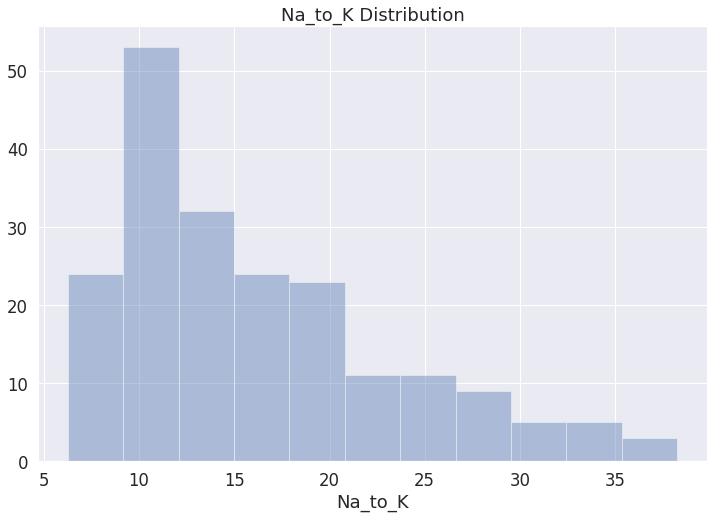

In [ ]:
plt.title("Na_to_K Distribution")
sns.distplot(df.Na_to_K, kde = False, color = "b")
plt.show()

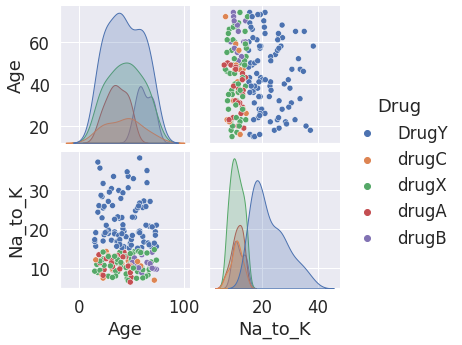

In [ ]:
sns.pairplot(data=df, hue="Drug")
plt.show()

In [ ]:
# Пропроцессинг
# Буду применять One-Hot Encoding вместо LabelEncoder т.к. уникальных значений признаков немного

In [ ]:
X = df.drop('Drug',axis=1)
y = df.Drug.values

In [ ]:
X = pd.get_dummies(X,['Sex','BP','Cholesterol'])
#y = LabelEncoder().fit_transform(df['Drug'])

In [ ]:
X.head()

,Age,Na_to_K,Sex_F,Sex_M,BP_HIGH,BP_LOW,BP_NORMAL,Cholesterol_HIGH,Cholesterol_NORMAL
0,23,25.355,1,0,1,0,0,1,0
1,47,13.093,0,1,0,1,0,1,0
2,47,10.114,0,1,0,1,0,1,0
3,28,7.798,1,0,0,0,1,1,0
4,61,18.043,1,0,0,1,0,1,0


In [ ]:
y[:5]

array(['DrugY', 'drugC', 'drugC', 'drugX', 'DrugY'], dtype=object)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X.values, y, 
                                                    train_size=0.75)

In [ ]:
# Виды ансамблевых методов
# Наиболее популярными ансамблевыми методами являются: стекинг, бэггинг, бустинг.

# Стекинг. Используется несколько разнородных слабых учеников. Их обучают и объединяют для построения прогноза, основанного на результатах различных слабых моделей.

# Бэггинг. В этом случае однородные модели обучают на разных наборах данных и объединяют. Получают прогноз путём усреднения. Если использовать в качестве слабого ученика деревья решений, то получится случайный лес RandomForestClassifier / RandomForestRegressor.

# Бустинг. При использовании данного метода несколько однородных моделей последовательно обучаются, исправляя ошибки друг друга.

In [ ]:
results_models_dict = {'Model Type' : [],
                   'Mean Train Accuracy': [],
                   'Test Accuracy':[],
                   'Test F1 score':[],
                   'Test Precision':[],
                   'Test Recall':[]}

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score

def model_results(model, y_pred, y_true = y_test):
    results_models_dict["Model Type"].append(model)
    results_models_dict['Test Accuracy'].append(round(accuracy_score(y_pred, y_true),2))
    results_models_dict['Test F1 score'].append(round(f1_score(y_pred, y_true, average='macro'),2))
    results_models_dict['Test Precision'].append(round(precision_score(y_pred, y_true,average='macro'),2))
    results_models_dict['Test Recall'].append(round(recall_score(y_pred, y_true,average='macro'),2))

In [ ]:
# Стекинг
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report


estimators = [('lr', LogisticRegression()), ('dt', DecisionTreeClassifier())]
modelClf1 = StackingClassifier(n_jobs = -1, estimators=estimators, final_estimator=SVC())

accuracies1 = cross_val_score(modelClf1, X_train, y_train, cv=4)
print(f'Средняя Accuracy на тренировочных выбрках = {np.mean(accuracies1):.2f}')
results_models_dict["Mean Train Accuracy"].append(round(np.mean(accuracies1),2))

modelClf1.fit(X_train, y_train)
target_names = df.Drug.unique()
y_pred_1 = modelClf1.predict(X_test)
model_results('Stacking Classifier', y_pred_1)
print("Результаты работы модели с помощью стекинга")
print(classification_report(y_test, y_pred_1, target_names=target_names))

Средняя Accuracy на тренировочных выбрках = 0.99
Результаты работы модели с помощью стекинга
              precision    recall  f1-score   support

       DrugY       1.00      1.00      1.00        23
       drugC       1.00      1.00      1.00         6
       drugX       1.00      1.00      1.00         6
       drugA       1.00      1.00      1.00         6
       drugB       1.00      1.00      1.00         9

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



In [ ]:
results_models_dict

{'Model Type': ['Stacking Classifier'],
 'Mean Train Accuracy': [0.99],
 'Test Accuracy': [1.0],
 'Test F1 score': [1.0],
 'Test Precision': [1.0],
 'Test Recall': [1.0]}

In [ ]:
# Бэггинг

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier

modelClf2 = BaggingClassifier(base_estimator=LogisticRegression(), n_estimators=20)
accuracies2 = cross_val_score(modelClf2, X_train, y_train, cv=4)
print(f'Средняя Accuracy на тренировочных выбрках = {np.mean(accuracies2):.2f}')
results_models_dict["Mean Train Accuracy"].append(round(np.mean(accuracies2),2))

modelClf2.fit(X_train, y_train)
y_pred_2 = modelClf2.predict(X_test)
model_results('Bagging Classifier', y_pred_2)
print("Результаты работы модели с помощью бэггинга")
print(classification_report(y_test, y_pred_2, target_names=target_names))

Средняя Accuracy на тренировочных выбрках = 0.91
Результаты работы модели с помощью бэггинга
              precision    recall  f1-score   support

       DrugY       1.00      0.91      0.95        23
       drugC       0.83      0.83      0.83         6
       drugX       0.83      0.83      0.83         6
       drugA       1.00      1.00      1.00         6
       drugB       0.82      1.00      0.90         9

    accuracy                           0.92        50
   macro avg       0.90      0.92      0.90        50
weighted avg       0.93      0.92      0.92        50



In [ ]:
results_models_dict

{'Model Type': ['Stacking Classifier', 'Bagging Classifier'],
 'Mean Train Accuracy': [0.99, 0.91],
 'Test Accuracy': [1.0, 0.92],
 'Test F1 score': [1.0, 0.9],
 'Test Precision': [1.0, 0.92],
 'Test Recall': [1.0, 0.9]}

In [ ]:
# Градиентный бустинг
from sklearn.ensemble import GradientBoostingClassifier


modelClf3 = GradientBoostingClassifier(max_depth=2, n_estimators=20)
                                      #learning_rate=1)
accuracies3 = cross_val_score(modelClf3, X_train, y_train, cv=4)

print(f'Средняя Accuracy на тренировочных выбрках = {np.mean(accuracies3):.2f}')
results_models_dict["Mean Train Accuracy"].append(round(np.mean(accuracies3),2))

modelClf3.fit(X_train, y_train)
y_pred_3 = modelClf3.predict(X_test)
model_results('Gradient Boosting Classifier', y_pred_3)
print("Результаты работы модели с помощью бэггинга")
print(classification_report(y_test, y_pred_3, target_names=target_names))

Средняя Accuracy на тренировочных выбрках = 0.97
Результаты работы модели с помощью бэггинга
              precision    recall  f1-score   support

       DrugY       1.00      1.00      1.00        23
       drugC       1.00      1.00      1.00         6
       drugX       1.00      1.00      1.00         6
       drugA       1.00      1.00      1.00         6
       drugB       1.00      1.00      1.00         9

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



In [ ]:
results_models_dict

{'Model Type': ['Stacking Classifier',
  'Bagging Classifier',
  'Gradient Boosting Classifier'],
 'Mean Train Accuracy': [0.99, 0.91, 0.97],
 'Test Accuracy': [1.0, 0.92, 1.0],
 'Test F1 score': [1.0, 0.9, 1.0],
 'Test Precision': [1.0, 0.92, 1.0],
 'Test Recall': [1.0, 0.9, 1.0]}

In [ ]:
## Сделаю простенькую нейросетку, чтобы избежать переобучения

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout ,Flatten
from tensorflow.keras.layers.experimental.preprocessing import Normalization

In [ ]:
normalize = Normalization()

In [ ]:
modelClf4 = Sequential([
    normalize,
    Flatten(input_shape=(9,)),
    Dense(32, activation='tanh'),
    Dense(5, activation='sigmoid'),
])

modelClf4.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy', 'Precision'])

In [ ]:
# От переобучения
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', mode='min', patience=20,restore_best_weights=True)

In [ ]:
model_history = modelClf4.fit(x=X_train, 
          y=pd.get_dummies(y_train), 
          epochs=500,
          batch_size=25,
          validation_data=(X_test, pd.get_dummies(y_test)),
          callbacks=[early_stop]
          )

Epoch 1/500
6/6 [==============================] - 1s 70ms/step - loss: 2.3231 - accuracy: 0.3000 - precision: 0.2160 - val_loss: 2.4020 - val_accuracy: 0.1800 - val_precision: 0.1596
Epoch 2/500
6/6 [==============================] - 0s 13ms/step - loss: 2.1359 - accuracy: 0.3000 - precision: 0.2319 - val_loss: 2.2011 - val_accuracy: 0.1800 - val_precision: 0.1585
Epoch 3/500
6/6 [==============================] - 0s 9ms/step - loss: 1.9692 - accuracy: 0.3000 - precision: 0.2511 - val_loss: 2.0217 - val_accuracy: 0.1800 - val_precision: 0.1831
Epoch 4/500
6/6 [==============================] - 0s 12ms/step - loss: 1.8201 - accuracy: 0.3000 - precision: 0.2463 - val_loss: 1.8566 - val_accuracy: 0.1800 - val_precision: 0.1579
Epoch 5/500
6/6 [==============================] - 0s 14ms/step - loss: 1.6759 - accuracy: 0.3000 - precision: 0.2903 - val_loss: 1.7127 - val_accuracy: 0.1800 - val_precision: 0.1800
Epoch 6/500
6/6 [==============================] - 0s 10ms/step - loss: 1.5571 - 

In [ ]:
y_pred4=modelClf4.predict(X_test)

2/2 [==============================] - 0s 7ms/step


In [ ]:
losses=pd.DataFrame(model_history.history)

In [ ]:
losses.head()

,loss,accuracy,precision,val_loss,val_accuracy,val_precision
0,2.323132,0.3,0.216028,2.402047,0.18,0.159574
1,2.135908,0.3,0.231939,2.201111,0.18,0.158537
2,1.969231,0.3,0.251082,2.021658,0.18,0.183099
3,1.820149,0.3,0.246305,1.856631,0.18,0.157895
4,1.675946,0.3,0.290323,1.712733,0.18,0.180000


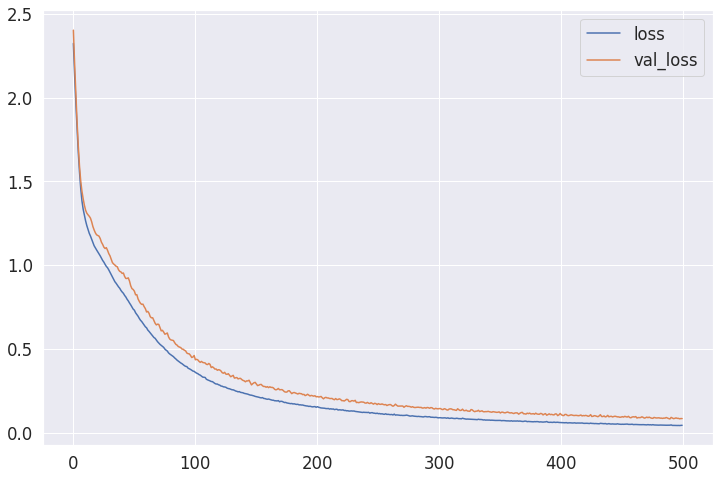

In [ ]:
losses[['loss','val_loss']].plot()
plt.show()

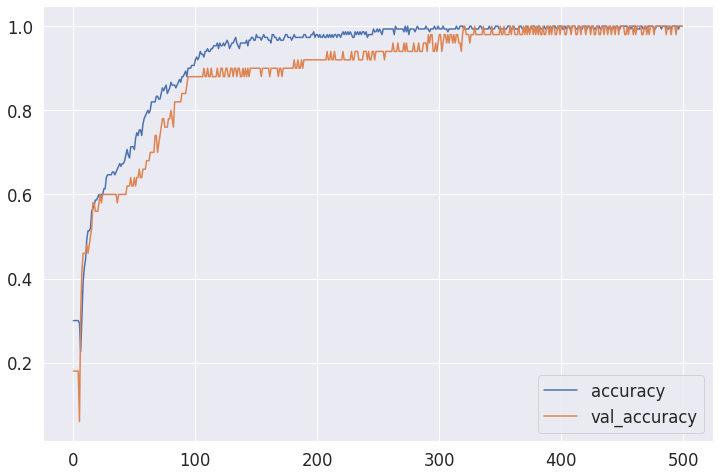

In [ ]:
losses[['accuracy','val_accuracy']].plot()
plt.show()

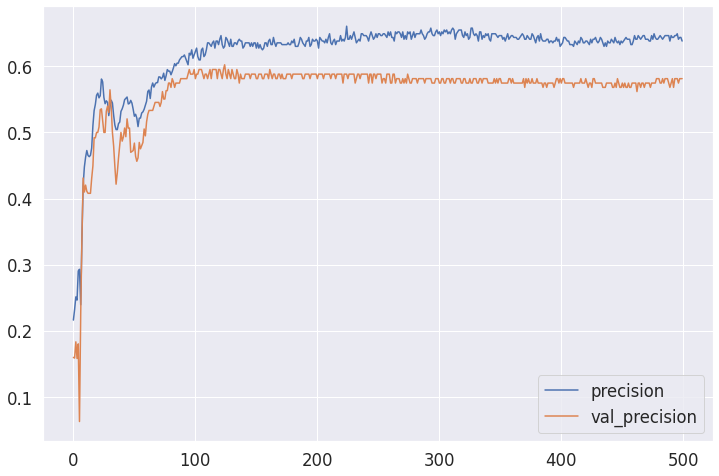

In [ ]:
losses[['precision','val_precision']].plot()
plt.show()

In [ ]:
results_models_dict

{'Model Type': ['Stacking Classifier',
  'Bagging Classifier',
  'Gradient Boosting Classifier'],
 'Mean Train Accuracy': [0.99, 0.91, 0.97],
 'Test Accuracy': [1.0, 0.92, 1.0],
 'Test F1 score': [1.0, 0.9, 1.0],
 'Test Precision': [1.0, 0.92, 1.0],
 'Test Recall': [1.0, 0.9, 1.0]}

In [ ]:
losses.accuracy.mean()

0.9282400040328502

In [ ]:
results_models_dict["Mean Train Accuracy"].append(round(losses.accuracy.mean(),2))

In [ ]:
y_pred4.argmax(axis=1)

array([0, 0, 4, 4, 0, 0, 3, 1, 0, 2, 2, 3, 0, 3, 0, 4, 0, 4, 1, 0, 0, 0,
       2, 0, 1, 0, 0, 4, 2, 1, 1, 2, 4, 2, 0, 3, 0, 4, 3, 0, 4, 1, 0, 0,
       0, 3, 4, 0, 0, 0])

In [ ]:
pd.get_dummies(y_test).values.argmax(axis=1)

array([0, 0, 4, 4, 0, 0, 3, 1, 0, 2, 2, 3, 0, 3, 0, 4, 0, 4, 1, 0, 0, 0,
       2, 0, 1, 0, 0, 4, 2, 1, 1, 2, 4, 2, 0, 3, 0, 4, 3, 0, 4, 1, 0, 0,
       0, 3, 4, 0, 0, 0])

In [ ]:
model_results('Neuron Network Classifier', y_pred4.argmax(axis=1), y_true = pd.get_dummies(y_test).values.argmax(axis=1))

In [ ]:
pd.DataFrame(results_models_dict)

,Model Type,Mean Train Accuracy,Test Accuracy,Test F1 score,Test Precision,Test Recall
0,Stacking Classifier,0.99,1.00,1.0,1.00,1.0
1,Bagging Classifier,0.91,0.92,0.9,0.92,0.9
2,Gradient Boosting Classifier,0.97,1.00,1.0,1.00,1.0
3,Neuron Network Classifier,0.93,1.00,1.0,1.00,1.0


In [ ]:
# Все модели показали превосходный результат, не в последнюю очередь из-за простоты и небольших размеров датасета
# В среднем лучше всех показал себя Gradient Boosting Classifier, хуже всех - Bagging Classifier